In [1]:
import random
# Global variable to count key comparisons
comparison_count = 0

# Insertion Sort with comparison count
def insertion_sort(arr):
    global comparison_count
    n = len(arr)
    for i in range(1, n):
        j = i
        while j > 0 and arr[j] < arr[j - 1]:
            comparison_count += 1  # Increment comparison count
            # Swap elements
            arr[j], arr[j - 1] = arr[j - 1], arr[j]
            j -= 1
        comparison_count += 1  # Last comparison where arr[j] >= arr[j - 1]
    return arr


# Hybrid Sort with comparison count
def hybrid_sort(arr, S):
    global comparison_count
    if len(arr) <= S:
        insertion_sort(arr)
    else:
        if len(arr) > 1:
            mid = len(arr) // 2
            left_half = arr[:mid]
            right_half = arr[mid:]

            hybrid_sort(left_half, S)
            hybrid_sort(right_half, S)

            i = j = k = 0
            while i < len(left_half) and j < len(right_half):
                comparison_count += 1  # Increment comparison count
                if left_half[i] < right_half[j]:
                    arr[k] = left_half[i]
                    i += 1
                else:
                    arr[k] = right_half[j]
                    j += 1
                k += 1

            while i < len(left_half):
                arr[k] = left_half[i]
                i += 1
                k += 1

            while j < len(right_half):
                arr[k] = right_half[j]
                j += 1
                k += 1
            return arr


Analyzing time complexity for dataset size n = 100000...
Optimal S for n = 100000: 21 (Time: 0.2076 seconds)
Analyzing time complexity for dataset size n = 200000...
Optimal S for n = 200000: 6 (Time: 0.4649 seconds)
Analyzing time complexity for dataset size n = 300000...
Optimal S for n = 300000: 16 (Time: 0.7505 seconds)
Analyzing time complexity for dataset size n = 400000...
Optimal S for n = 400000: 16 (Time: 1.0508 seconds)
Analyzing time complexity for dataset size n = 500000...
Optimal S for n = 500000: 16 (Time: 1.3999 seconds)


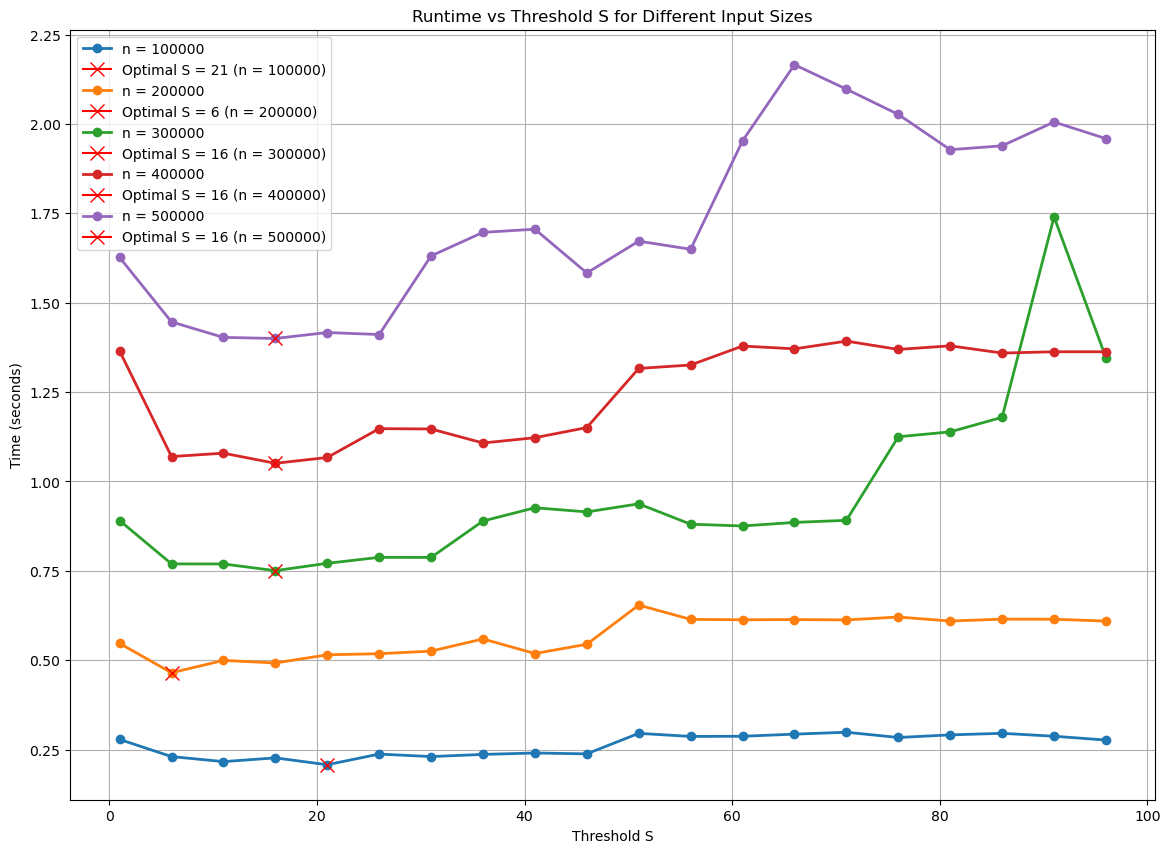

In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

# Function to load dataset from CSV file (pre-load once)
def load_dataset(size):
    df = pd.read_csv(f'dataset_{size}.csv')  # Load the CSV file once
    return df['Value'].tolist()  # Convert the column to a list

# Function to run hybrid sort and average over multiple trials to reduce variability
def run_hybrid_sort_multiple_trials(arr, S, trials=3):
    total_time = 0
    for _ in range(trials):
        np.random.shuffle(arr)  # Shuffle the dataset instead of copying
        start_time = time.time()
        hybrid_sort(arr, S)
        end_time = time.time()
        total_time += end_time - start_time
    return total_time / trials  # Return the average time

# Function to analyze time complexity for varying S for multiple input sizes
def analyze_time_complexity_for_multiple_sizes(sizes, S_values, trials=3):
    plt.figure(figsize=(14, 10))

    # Iterate over different input sizes (load dataset once per size)
    for size in sizes:
        dataset = load_dataset(size)  # Load the dataset only once
        time_results = []

        print(f"Analyzing time complexity for dataset size n = {size}...")

        # For each size, run hybrid sort for each value of S and record the time taken
        for S in S_values:
            time_taken = run_hybrid_sort_multiple_trials(dataset, S, trials=trials)  # Use pre-loaded dataset
            time_results.append(time_taken)

        # Find the minimum time and the corresponding S
        min_time = min(time_results)
        optimal_S = S_values[time_results.index(min_time)]
        print(f"Optimal S for n = {size}: {optimal_S} (Time: {min_time:.4f} seconds)")

        # Plot the results for this dataset size (Actual time, not theoretical)
        plt.plot(S_values, time_results, marker='o', label=f"n = {size}", linewidth=2, markersize=6)

        # Highlight the optimal S value
        plt.plot(optimal_S, min_time, marker='x', markersize=10, color="red", label=f"Optimal S = {optimal_S} (n = {size})")
    
    # Automatically adjust y-axis scaling based on data
    plt.autoscale()

    # Add labels and legend to the plot
    plt.title('Runtime vs Threshold S for Different Input Sizes')
    plt.xlabel('Threshold S')
    plt.ylabel('Time (seconds)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Define sizes and S values
sizes = [100000, 200000, 300000, 400000, 500000]  # Different dataset sizes
S_values = range(1, 101, 5)  # Test S values every 5 steps to reduce runtime

# Analyze time complexity for multiple input sizes
analyze_time_complexity_for_multiple_sizes(sizes, S_values, trials=3)
